## BARREL Background Subtracted Spectrum


### Setup
Start by importing libraries and loading data from a potentially interesting event.

In this guide, we are going to use interactive plots, so `%matplotlib ipympl` should be set.

In [2]:
%matplotlib ipympl
import pyspedas, pytplot

For our example, we will look at data from flight 1G from January 17th - 19th, 2013.

FSPC and SSPC data can be downloaded with the `pyspedas.barrel` helper functions:

In [3]:
trange=['2013-01-17', '2013-01-19']

pyspedas.barrel.fspc(
    trange=trange,
    probe='1g'
)

pyspedas.barrel.sspc(
    trange=trange,
    probe='1g'
)

22-Nov-24 04:07:41: File is current: barrel_data/l2/1g/fspc/bar_1g_l2_fspc_20130117_v10.cdf
22-Nov-24 04:07:41: File is current: barrel_data/l2/1g/fspc/bar_1g_l2_fspc_20130118_v10.cdf
22-Nov-24 04:07:44: File is current: barrel_data/l2/1g/sspc/bar_1g_l2_sspc_20130117_v10.cdf
22-Nov-24 04:07:44: File is current: barrel_data/l2/1g/sspc/bar_1g_l2_sspc_20130118_v10.cdf


['brl1G_Quality', 'brl1G_SSPC', 'brl1G_Peak_511', 'brl1G_SSPC_UNCAL']

### Background subtraction
Plot FSPC1 for the loaded data and visually determine the start and stop locations for the background selection.

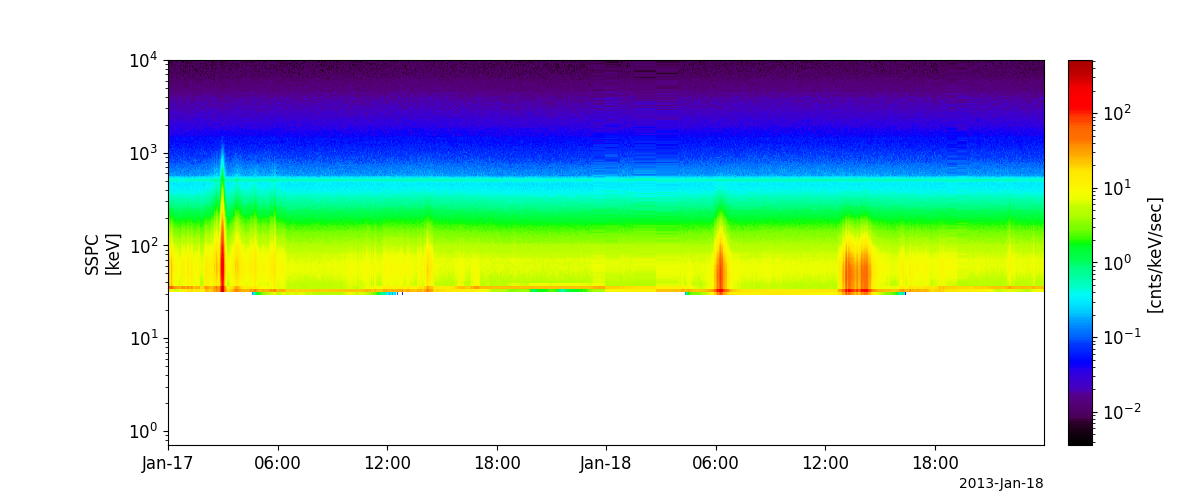

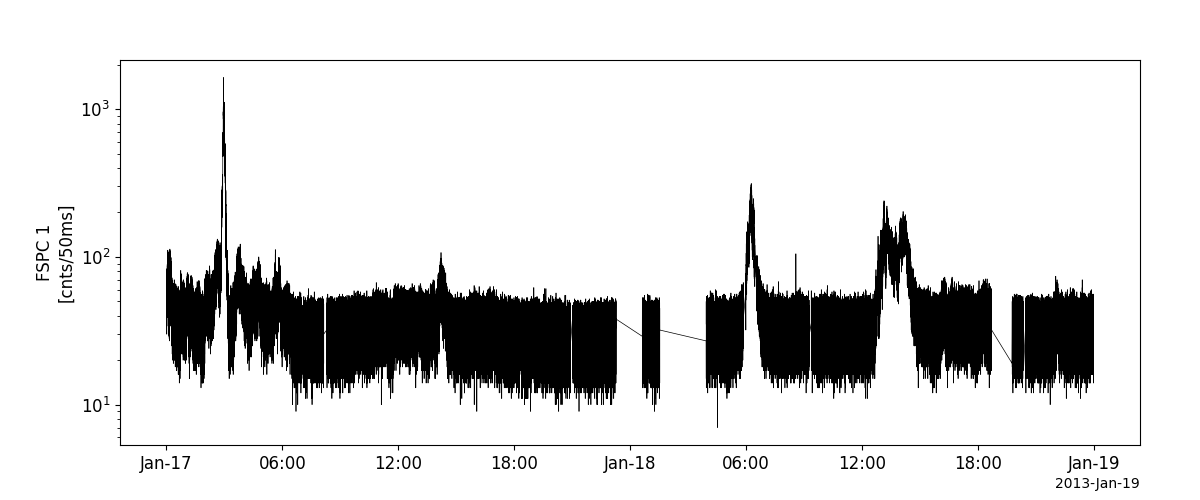

In [4]:
pytplot.tplot('brl1G_SSPC')
pytplot.tplot('brl1G_FSPC1')

By moving the mouse cursor over a quiet area of the plot, we can estimate values for the start and stop times.
In this way we can find one or more periods of time to use for background calculation.

These start and stop times can be stored in a list of tuples:

In [5]:
background_periods=[("2013-01-17/17:25", "2013-01-17/20:35"), ("2013-01-18/09:35", "2013-01-18/12:04")]

Similarly, we can use the plot to estimate the time period of the event that we are interested in:

In [6]:
event_period=("2013-01-17/01:54", "2013-01-17/03:24")

Next we will extract the SSPC data and send it to the `pyspedas.barrel.average_event_spectrum` function. This will return a background subtracted average spectrum of the event. This data is stored in a new tplot variable with the x axis set to show the energy levels.

22-Nov-24 04:07:50: /home/wrexroad/anaconda3/envs/pyspedas/lib/python3.12/site-packages/traitlets/traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(



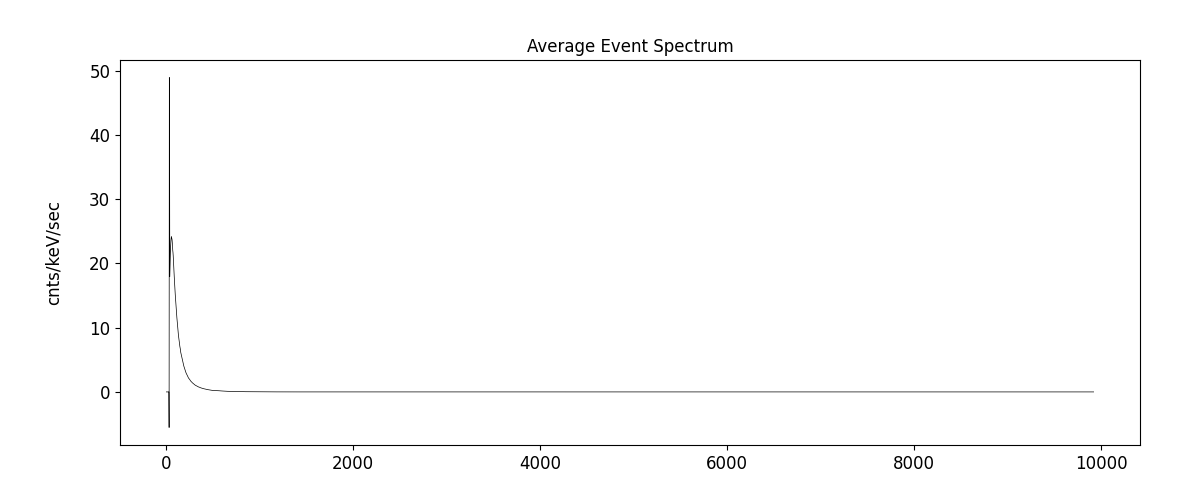

In [7]:
ts, cnts, energy_levels = pytplot.get_data('brl1G_SSPC')
spec = pyspedas.barrel.spec.average_event_spectrum(ts, cnts, energy_levels, background_periods, event_period)
pytplot.store_data("brl1G_Event_Spec", data={'x':energy_levels, 'y':spec})
pytplot.options("brl1G_Event_Spec", opt_dict={"name": "Average Event Spectrum", "ytitle": "cnts/keV/sec"})
pytplot.tplot("brl1G_Event_Spec")

In addition to plotting the event spectrum, we can generate a background-subtracted spectrogram using the `pyspedas.barrel.background_subtracted_spectrogram` function. 

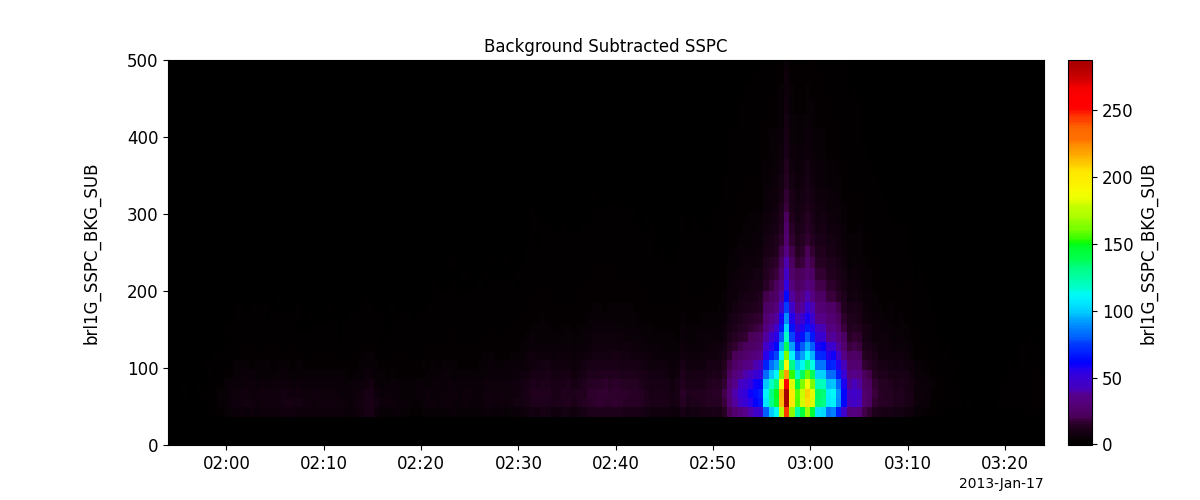

In [8]:
#The background subtracted spectrogram function only takes the background time periods, not the event time periods.
bg_sub_spectrogram = pyspedas.barrel.spec.background_subtracted_spectrogram(ts, cnts, energy_levels, background_periods)
pytplot.store_data("brl1G_SSPC_BKG_SUB", data={'x':ts, 'y':bg_sub_spectrogram, 'v':energy_levels})
pytplot.options("brl1G_SSPC_BKG_SUB", "name", "Background Subtracted SSPC")

#If the option for the spectrogram plot isn't set, it will plot a stack of line plots
pytplot.options("brl1G_SSPC_BKG_SUB", "Spec", 1) 

#We can guess at the y axis range by looking at the event stectum above. Setting the upper limit to 500keV will capture all of the counts
pytplot.options("brl1G_SSPC_BKG_SUB", "yrange", [0, 500])

#Use the estimated event period to set the time range for the plot
pytplot.tlimit(list(event_period))

pytplot.tplot("brl1G_SSPC_BKG_SUB")